In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ks_2samp
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.simplefilter("ignore")

HappinessScore = pd.read_csv(r"data\World Happiness Report 2022.csv")

# Extracting relevant columns
HS = HappinessScore.iloc[:, 2]
GDP = HappinessScore.iloc[:, 6]

HappinessScore.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [2]:
# Summary statistics
print(HS.describe())
print(GDP.describe())

# Variance
print(np.var(HS))
print(np.var(GDP))

# Mode
print(HS.mode().values[0])
print(GDP.mode().values[0])

# Standard deviation
print(np.std(HS))
print(np.std(GDP))

# Coefficient of variation
cvH = np.std(HS) / np.mean(HS)
cvG = np.std(GDP) / np.mean(GDP)

# Interquartile range
rkH = np.percentile(HS, 75) - np.percentile(HS, 25)
rkG = np.percentile(GDP, 75) - np.percentile(GDP, 25)

# Coefficient of quartile variation
ckH = rkH / np.mean(HS)
ckG = rkG / np.mean(GDP)

count    146.000000
mean       5.553575
std        1.086843
min        2.404000
25%        4.888750
50%        5.568500
75%        6.305000
max        7.821000
Name: Happiness score, dtype: float64
count    146.000000
mean       1.410445
std        0.421663
min        0.000000
25%        1.095500
50%        1.445500
75%        1.784750
max        2.209000
Name: Explained by: GDP per capita, dtype: float64
1.1731362580221432
0.17658197302495782
4.516
1.815
1.0831141481959061
0.42021657871264173


In [3]:
# Third central moment
m3CH = np.mean((HS - np.mean(HS)) ** 3)
m3CG = np.mean((GDP - np.mean(GDP)) ** 3)

# Third relative moment
m3WH = m3CH / np.std(HS) ** 3
m3WG = m3CG / np.std(GDP) ** 3

# Fourth central moment
m4CH = np.mean((HS - np.mean(HS)) ** 4)
m4CG = np.mean((GDP - np.mean(GDP)) ** 4)

# Fourth relative moment
m4WH = m4CH / np.std(HS) ** 4
m4WG = m4CG / np.std(GDP) ** 4

# Skewness
def skewness(data):
    return (np.percentile(data, 75) - 2 * np.median(data) + np.percentile(data, 25)) / (np.percentile(data, 75) - np.percentile(data, 25))

skewH = skewness(HS)
skewG = skewness(GDP)

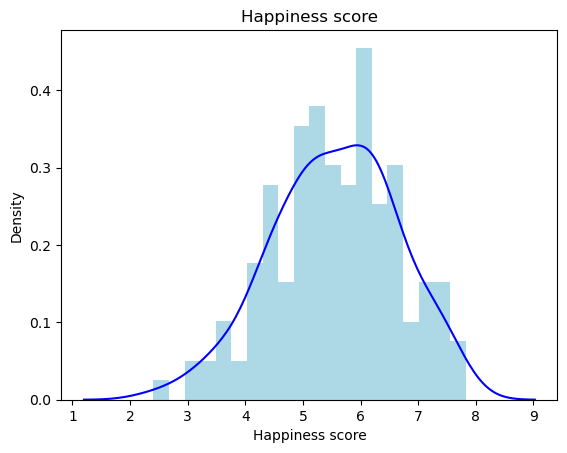

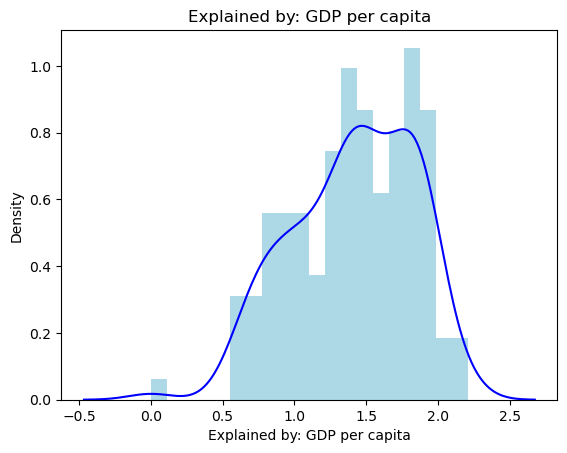

In [4]:
# Histograms
plt.hist(HS, bins=20, density=True, color='lightblue')
sns.kdeplot(HS, color='blue')
plt.title("Happiness score")
plt.show()

plt.hist(GDP, bins=20, density=True, color='lightblue')
sns.kdeplot(GDP, color='blue')
plt.title("Explained by: GDP per capita")
plt.show()

Shapiro-Wilk test p-value for HS: 0.3863336145877838
Kolmogorov-Smirnov test p-value for GDP: 4.0176148162480715e-39


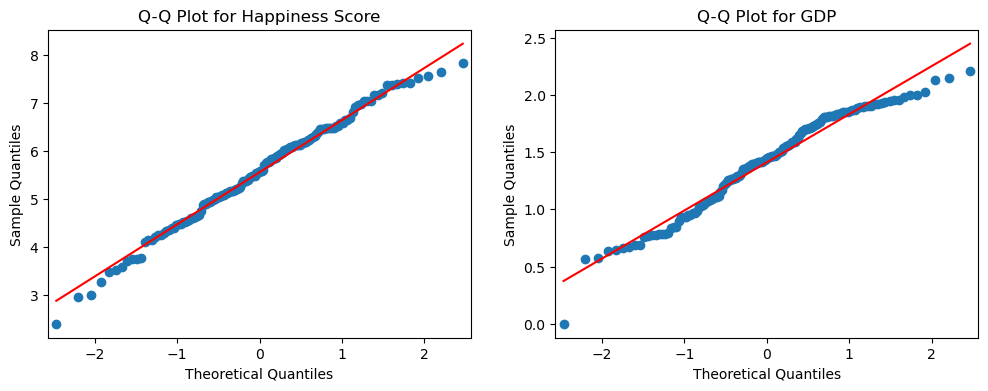

In [5]:
# Testing normality
_, p_value_HS = shapiro(HS)
print(f"Shapiro-Wilk test p-value for HS: {p_value_HS}")

_, p_value_GDP = ks_2samp(GDP, np.random.normal(size=len(GDP)))
print(f"Kolmogorov-Smirnov test p-value for GDP: {p_value_GDP}")

# Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

qqplot(HS, line='s', ax=ax[0])
ax[0].set_title("Q-Q Plot for Happiness Score")

qqplot(GDP, line='s', ax=ax[1])
ax[1].set_title("Q-Q Plot for GDP")

plt.show()

In [6]:
# Confidence intervals for HS1 for p=0.95
conf_int_HS = DescrStatsW(HS).tconfint_mean(alpha=0.05)
print(f"Confidence interval for HS: {conf_int_HS}")

Confidence interval for HS: (5.375797283122798, 5.7313534018087084)


In [7]:
# Spearman correlation test
from scipy import stats
spearman_corr = stats.spearmanr(HS, GDP)
print(f"Spearman correlation coefficient: {spearman_corr}")

Spearman correlation coefficient: SignificanceResult(statistic=0.8214992895154466, pvalue=5.955808755581406e-37)


                            OLS Regression Results                            
Dep. Variable:                     HS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     201.5
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.73e-29
Time:                        23:26:43   Log-Likelihood:                -154.94
No. Observations:                 146   AIC:                             313.9
Df Residuals:                     144   BIC:                             319.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7773      0.204     13.609      0.0

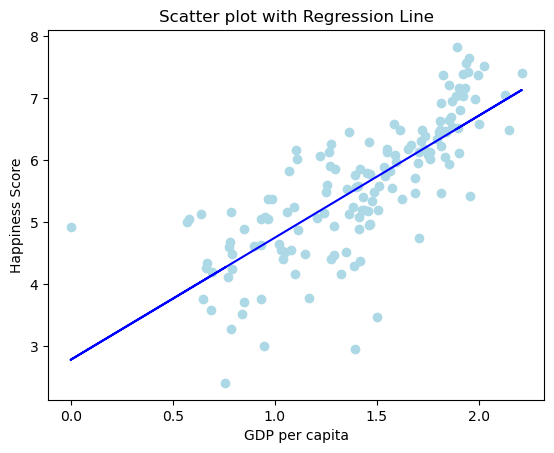

In [8]:
# Linear regression
model = ols("HS ~ GDP", data=HappinessScore).fit()
print(model.summary())

# Scatter plot with regression line
plt.scatter(GDP, HS, color='lightblue')
plt.plot(GDP, model.predict(), color='blue')
plt.title("Scatter plot with Regression Line")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.show()